### Loading and viewing your data
In this chapter, you're going to look at a subset of the Department of Buildings Job Application Filings dataset from the NYC Open Data portal. This dataset consists of job applications filed on January 22, 2017.

Your first task is to load this dataset into a DataFrame and then inspect it using the .head() and .tail() methods. However, you'll find out very quickly that the printed results don't allow you to see everything you need, since there are too many columns. Therefore, you need to look at the data in another way.

The .shape and .columns attributes let you see the shape of the DataFrame and obtain a list of its columns. From here, you can see which columns are relevant to the questions you'd like to ask of the data. To this end, a new DataFrame, df_subset, consisting only of these relevant columns, has been pre-loaded. This is the DataFrame you'll work with in the rest of the chapter.

Get acquainted with the dataset now by exploring it with pandas! This initial exploratory analysis is a crucial first step of data cleaning.

In [ ]:
import pandas as pd
df.head()
df.tail()
df.columns #returns column names
df.shape #returns dimension
df.info() #additional info about the df

In [2]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('dob_job_application_filings_subset.csv')

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

# Print the info of df
print(df.info())

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

            ...                         Owner's Last Name  \
0           ...            MIGLIORE                         
1           ...            BLUMENBERG                       
2           ...        

/Users/ziyufan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Frequency counts for categorical data
As you've seen, .describe() can only be used on numeric columns. So how can you diagnose data issues when you have categorical data? One way is by using the .value_counts() method, which returns the frequency counts for each unique value in a column!

This method also has an optional parameter called dropna which is True by default. What this means is if you have missing data in a column, it will not give a frequency count of them. You want to set the dropna column to False so if there are missing values in a column, it will give you the frequency counts.

In this exercise, you're going to look at the 'Borough', 'State', and 'Site Fill' columns to make sure all the values in there are valid. When looking at the output, do a sanity check: Are all values in the 'State' column from NY, for example? Since the dataset consists of applications filed in NY, you would expect this to be the case.

In [3]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64


### Visualizing single variables with histograms
Up until now, you've been looking at descriptive statistics of your data. One of the best ways to confirm what the numbers are telling you is to plot and visualize the data.

You'll start by visualizing single variables using a histogram for numeric values. The column you will work on in this exercise is 'Existing Zoning Sqft'.

The .plot() method allows you to create a plot of each column of a DataFrame. The kind parameter allows you to specify the type of plot to use - kind='hist', for example, plots a histogram.

In the IPython Shell, begin by computing summary statistics for the 'Existing Zoning Sqft' column using the .describe() method. You'll notice that there are extremely large differences between the min and max values, and the plot will need to be adjusted accordingly. In such cases, it's good to look at the plot on a log scale. The keyword arguments logx=True or logy=True can be passed in to .plot() depending on which axis you want to rescale.

Finally, note that Python will render a plot such that the axis will hold all the information. That is, if you end up with large amounts of whitespace in your plot, it indicates counts or values too small to render.

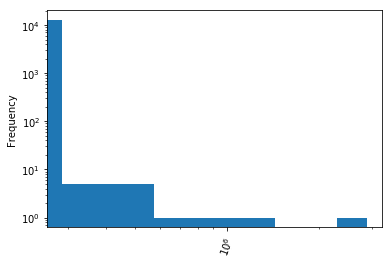

In [5]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Describe the column
df['Existing Zoning Sqft'].describe()

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()


### Visualizing multiple variables with boxplots
Histograms are great ways of visualizing single variables. To visualize multiple variables, boxplots are useful, especially when one of the variables is categorical.

In this exercise, your job is to use a boxplot to compare the 'initial_cost' across the different values of the 'Borough' column. The pandas .boxplot() method is a quick way to do this, in which you have to specify the column and by parameters. Here, you want to visualize how 'initial_cost' varies by 'Borough'.

pandas and matplotlib.pyplot have been imported for you as pd and plt, respectively, and the DataFrame has been pre-loaded as df.

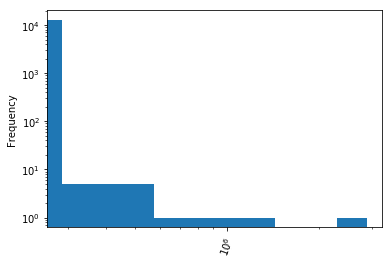

In [10]:
# modified, added by Jinny

import pandas as pd
dat = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_2023/datasets/dob_job_application_filings_subset.csv'
load = pd.read_csv(dat)
load.to_csv('dob_job_application_filings_subset.csv', index=False)

df_subset = load[['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee', 'Existing Zoning Sqft', 'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories', 'Proposed No. of Stories', 'Existing Height', 'Proposed Height']]

# Read the file into a DataFrame: df
df = pd.read_csv('dob_job_application_filings_subset.csv')

df['initial_cost'] = df['Initial Cost'].str[1:].astype(float)
df['total_est_fee'] = df['Total Est. Fee'].str[1:].astype(float)
df.to_csv('dob_job_application_filings_subset.csv', index=False)
df_subset = df[['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee', 'Existing Zoning Sqft', 'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories','Proposed No. of Stories', 'Existing Height', 'Proposed Height']]
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
# Describe the column
df['Existing Zoning Sqft'].describe()
# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)
# Display the histogram
plt.show()



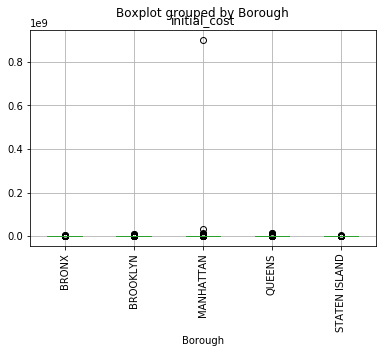

In [11]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create the boxplot
df.boxplot(column='initial_cost', by='Borough', rot=90)

# Display the plot
plt.show()